# Naive Bayes Classifier

###### Type of data we have
1. Class: no-recurrence-events, recurrence-events
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
3. menopause: lt40, ge40, premeno.
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
6. node-caps: yes, no.
7. deg-malig: 1, 2, 3.
8. breast: left, right.
9. breast-quad: left-up, left-low, right-up, right-low, central.
10. irradiat: yes, no.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

%matplotlib inline

data = pd.read_csv('dataset.csv')

dataset = np.array(data)
data

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-Quad,Irradiant
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


###### Removing datapoints with missing values
 * we remove occurances of the question mark symbol (?)
 * The Function return a data set with no datapoints containing missing values and a dataset only containing data with missing values


In [2]:
def deleteMissing(data):
    indices = np.array([])
    missingValues = np.empty((0,10))
    dataset = data
    for i in  range(len(dataset)):
        for j in range(len(dataset[i])):
            if dataset[i][j] == '?':
                indices = np.append(indices , [int(i)])
                missingValues = np.append(missingValues , np.array([dataset[int(i)]]), axis = 0 )

    for i in range(len(indices)):
        # We start deleting in from the dataset from the end of the indices array
        dataset = np.delete(dataset , int(indices[len(indices)-1-i]) , 0 )
    return (dataset , missingValues);



##### Setting appropriate datasets
* we start with a dataset the will have no occurences of data points with missing values
* Next is a dataset of all datapoints with missing values
* Finally we set set make a data set similar to the dataset withouth missing values which we will later change

In [3]:
dataset , dataWithMissingValues = deleteMissing(dataset)
datasetNMV = dataset # We later make this dataset a complete dataset with no occurences of missing data points
a , dataWithMissingValues1 = deleteMissing(np.array(data)) # To be used to replace with more most appearances
datasetMCV = dataset # we later make this a complete dataset where the missing values are replaced with the most appearing

###### Below we split the data into training , testing and validating data 
* We first shuffle the data to randomise it
* We then split the data accordingly

In [4]:
# Give the data a random shuffle first
np.random.shuffle(dataset)

# Data split
trainingData , testData = dataset[:int(.70 * dataset.shape[0])] , dataset[int(.70 * dataset.shape[0]):]

print(trainingData.shape , testData.shape)

(193, 10) (84, 10)


##### The Priors
* The function below receives an array of classes
* It then returns an array of the amount of classes are there
* It also return an array of how many times each class appears in the input Array
* Lastly It returns an array of probabilities for each class
* This is to be used inside the Naive Bayes function

In [5]:
def Priors(classArray):
    probabilities = np.array([])
    classes , counts = np.unique(classArray , return_counts = True)
    
    for i in counts:
        probabilities = np.append(probabilities , [i/np.sum(counts)])
    
    return (classes , counts , probabilities)


##### Naive Bayes
* This class receives and index, idexing a feature to be used as an array of classes we are trying to classify
* It also receives a matric of training data
* it also receives a datapoint we are trying to classify
* `The Function returns an array of probabilities and an array of classes`

In [6]:
def NaiveBayes(classIndex , trainData , dataPoint , featureNum):
    classes , classCounts , priorProbs = Priors(trainData[:,classIndex])
    totalProbs = np.array([])
    
    for i in range(len(classes)):
        
        prob = priorProbs[i]
        Class = classes[i]
        classOccurance = classCounts[i]
        
        for j in range(len(dataPoint)):
            
            if (featureNum == 5 ) and (j == 0 or j == 1 or j == 2 or j == 8 ):
                continue
            
            if j == classIndex:
                continue
                
            fCount = 0
            
            for k in range(len(trainData)):
                if len(np.where(trainData[k][classIndex] == Class and trainData[k][j] == dataPoint[j])[0] > 0):
                    fCount += 1 
            
            fCount = fCount/classOccurance
            prob *= fCount 
            
        totalProbs = np.append(totalProbs , [prob])
    
    return (totalProbs , classes);
   


##### Dealing with missing Values
* We now need to predict what the missing values are using our Naive bayes classifier
* Once we have done that we need to add those data points back to the main data set
* Then lastly we need to run our classifier on the complete data set

In [7]:
# remember we have a matric of missing data points named dataWithMissingvalues

def fixMissingValues(data , missingData):
    dataset = data
    miss = missingData
    newData = np.empty((0,10))
    for dataPoint in miss:
        d = dataPoint      ## This was for testing, it works just fine so no need to change it
        if dataPoint[5] == '?':
            probs , classes = NaiveBayes(5 , dataset , dataPoint , 10)
            d[5] = classes[np.argmax(probs)]
            dataset = np.append(dataset , [d] , axis = 0)
        elif dataPoint[8] == '?':
            probs , classes = NaiveBayes(8 , dataset , dataPoint , 10)
            d[8] = classes[np.argmax(probs)]
            dataset = np.append(dataset , [d] , axis = 0)
      
    return dataset

In [8]:
def replaceMissingValues(data , missingData):
    dataset  = data
    miss = missingData
    newData = np.empty((0,10))
    for dataPoint in miss:
        d = dataPoint      ## This was for testing, it works just fine so no need to change it
        if dataPoint[5] == '?':
            classes , counts = np.unique(data[:,5] , return_counts = True)
            d[5] = classes[np.argmax(counts)]
            dataset = np.append(dataset , [d] , axis = 0)
        elif dataPoint[8] == '?':
            classes , counts = np.unique(data[:,8] , return_counts = True)
            d[8] = classes[np.argmax(counts)]
            dataset = np.append(dataset , [d] , axis = 0)
            
    return dataset

### DatasetNMV is the Dataset with no occurences of missing values
* From this data we will create a training and a testing set
* Which we will later use for reporting accuracies

In [9]:
datasetNMV = fixMissingValues(datasetNMV, dataWithMissingValues)
datasetMCV = replaceMissingValues(datasetMCV,dataWithMissingValues1) 

np.random.shuffle(datasetNMV)
TrainSet , TestSet = datasetNMV[:int(.70*len(datasetNMV))] , datasetNMV[int(.70*len(datasetNMV)):]


 ### Confusion Matrix
* Below is a generalized confusion matrix taking in the training set and testing set
* The Function returns a confusion matric which we will use to analyse and deduce information for our model
* We are going to run the Model on the complete data set as well as the set with no missing value occurances
> `Information :` 
 * index is the feature index
 * TP is For TRUE POSITIVE
 * TN is TRUE NEGATIVE
 *  FN is FALSE NEGATIVE
 * FP is fALSE POSITIVE

In [10]:
def ConfusionMatric(trainingSet , testingSet , featureNum ):
    index = 0
    TP = 0 
    TN = 0 
    FN = 0 
    FP = 0
    
    for dataPoint in testingSet:
        probs , classes = NaiveBayes(index , trainingSet , dataPoint , featureNum)
        predicted = classes[np.argmax(probs)]
        trueValue = dataPoint[index]
        
        if trueValue == 'recurrence-events':
            if predicted == trueValue:
                TP += 1
            else : 
                FN += 1
        else:
            if predicted == trueValue:
                TN += 1
            else : 
                FP += 1
    
    
    ConfusionMatrix = np.array([[TP , FP],[FN , TN]])
    return ConfusionMatrix


### Analysis
> Here we write a fucntion that receives a confusion matric this functions returns: 
* The Accuracy of the model
* The Specificity (AKA True Negative Rate)
* The Precision , Ration of correct Positive examples to Total positive examples
* The Recall, ratio of the number of correct positive examples out of those that were classified as positive

In [11]:
def Analysis(confusionMatric):
    Tp = confusionMatric[0][0]
    Fp = confusionMatric[0][1]
    Fn = confusionMatric[1][0]
    Tn = confusionMatric[1][1]
    
    accuracy = (Tp + Tn) / (Tp + Fp + Fn + Tn)
    specificity = Tn / (Tn + Fp)
    precision = Tp / (Tp + Fp)
    recall = Tp / (Tp + Fn)
    
    return(accuracy , specificity , precision , recall)

### Averages
* Below we run the algorithm again and again for a given dataset
* This function basically prints out stuff and returns nothing
* This function prints out the evarage amount Analysis of the date
* The function receives a dataset and the amount of times one would want the algorithm to run


In [12]:
def Averages(data , amount , featureNum):
    dataset = data
    TP = 0 
    TN = 0 
    FN = 0 
    FP = 0
    
    for i in range(amount):
        np.random.shuffle(dataset)
        # Data split
        trainingData , testData = dataset[:int(.70 * dataset.shape[0])] , dataset[int(.70 * dataset.shape[0]):]
        
        confusionMatric = ConfusionMatric(trainingData, testData , featureNum)
        TP += confusionMatric[0][0]
        FP += confusionMatric[0][1]
        FN += confusionMatric[1][0]
        TN += confusionMatric[1][1]
        
        
    ConfusionMatrix = np.array([[int(TP/amount) , int(FP/amount)],[int(FN/amount) , int(TN/amount)]])
    accuracy , specificity , precision , recall = Analysis(ConfusionMatrix)
    sb.heatmap(ConfusionMatrix , annot = True)
    print("The average accuracy of the given dataset is: ", accuracy)
    print("The average recall of the given dataset is: ", recall)
    print("The average specificity of the given dataset is: " , specificity)
    print("The average precision of the given dataset is: " , precision)

# Finally Reporting Averages

--------------------------------------------------------------
### reporting for all the features in dataset
--------------------------------------------------------------
* ` The Averages function receives the inputs, the dataset , number of times the classifier should be run , and an integer value which says which features should be active, all 9 features or only important ones` 
> ###### Dataset
* This is the dataset with occurences of missing values removed
> ###### DatasetNMV
* This data set has occurences of missing values replaced through passing it into a classifier
> ###### DatasetMCV
* This data set has occurences of missing valuses replaced by replacing the missing value with the most appearing value for that feature

The average accuracy of the given dataset is:  0.7349397590361446
The average recall of the given dataset is:  0.4583333333333333
The average specificity of the given dataset is:  0.847457627118644
The average precision of the given dataset is:  0.55


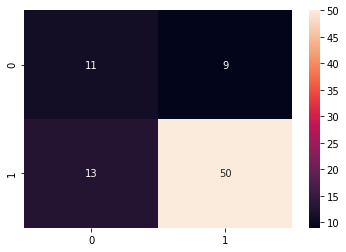

In [13]:
Averages(dataset, 20 , 10)

The average accuracy of the given dataset is:  0.7023809523809523
The average recall of the given dataset is:  0.375
The average specificity of the given dataset is:  0.8333333333333334
The average precision of the given dataset is:  0.47368421052631576


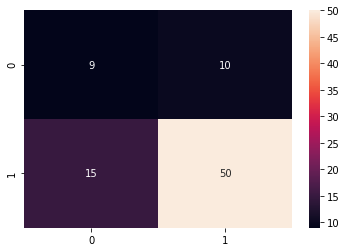

In [14]:
Averages(datasetNMV, 20 , 10)

The average accuracy of the given dataset is:  0.7176470588235294
The average recall of the given dataset is:  0.48
The average specificity of the given dataset is:  0.8166666666666667
The average precision of the given dataset is:  0.5217391304347826


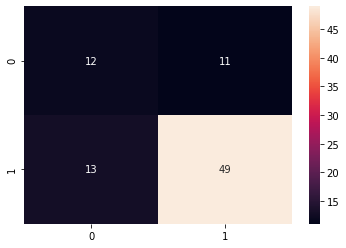

In [19]:
Averages(datasetMCV, 20 , 10)

### Reporting using the 5 features that contribute the most 
---
* ` The Averages function receives the inputs, the dataset , number of times the classifier should be run , and an integer value which says which features should be active, all 9 features or only important ones` 
> ###### Dataset
* This is the dataset with occurences of missing values removed
> ###### DatasetNMV
* This data set has occurences of missing values replaced through passing it into a classifier
> ###### DatasetMCV
* This data set has occurences of missing valuses replaced by replacing the missing value with the most appearing value for that feature

The average accuracy of the given dataset is:  0.7439024390243902
The average recall of the given dataset is:  0.5
The average specificity of the given dataset is:  0.8448275862068966
The average precision of the given dataset is:  0.5714285714285714


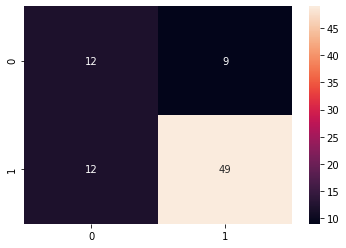

In [16]:
Averages(dataset, 20 , 5)

The average accuracy of the given dataset is:  0.7261904761904762
The average recall of the given dataset is:  0.4
The average specificity of the given dataset is:  0.864406779661017
The average precision of the given dataset is:  0.5555555555555556


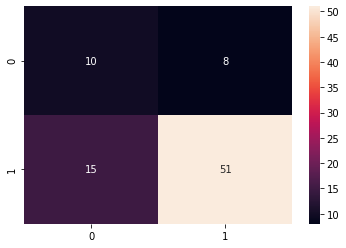

In [17]:
Averages(datasetNMV, 20 , 5)

The average accuracy of the given dataset is:  0.75
The average recall of the given dataset is:  0.4782608695652174
The average specificity of the given dataset is:  0.8524590163934426
The average precision of the given dataset is:  0.55


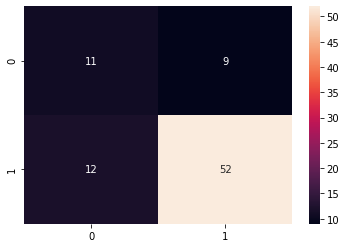

In [20]:
Averages(datasetMCV, 20 , 5) #MCV for MOST COMMON VALUE